In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Tarea 66 - Crear base de datos SQLite e insertar los datos

In [3]:
import sqlite3
import pandas as pd

# 1. Cargar el archivo CSV
# Asegúrate de poner la ruta correcta del archivo CSV
df = pd.read_csv('C:/Users/valki/Documents/Andre/IBM/Proyecto Final/Practicas Labs/Labs/survey-data.csv')

# 2. Crear la conexión a la base de datos SQLite (esto crea el archivo si no existe)
conn = sqlite3.connect('survey-data.sqlite')

In [4]:
# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [5]:
### Tarea 67 - Verificar los datos en la base de datos SQLite

In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source proje

In [7]:
### Tarea 68: Ejecutar una consulta SQL

In [8]:
# 1. Contar el número de filas en la tabla llamada 'main'
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,51572


In [9]:
# Tarea 69: Listar todas las tablas

In [10]:
# 1. Para ver los nombres de todas las tablas en la base de datos
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [11]:
### Tarea 70: Ejecutar una consulta de Group By

In [12]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,10189
1,25-34 years old,18899
2,35-44 years old,12473
3,45-54 years old,5419
4,55-64 years old,2272
5,65 years or older,654
6,Prefer not to say,241
7,Under 18 years old,1425


In [13]:
### Tarea 71: Describir una tabla

In [14]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" REAL,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [15]:
### Tarea 72: Histograma de CompTotal

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


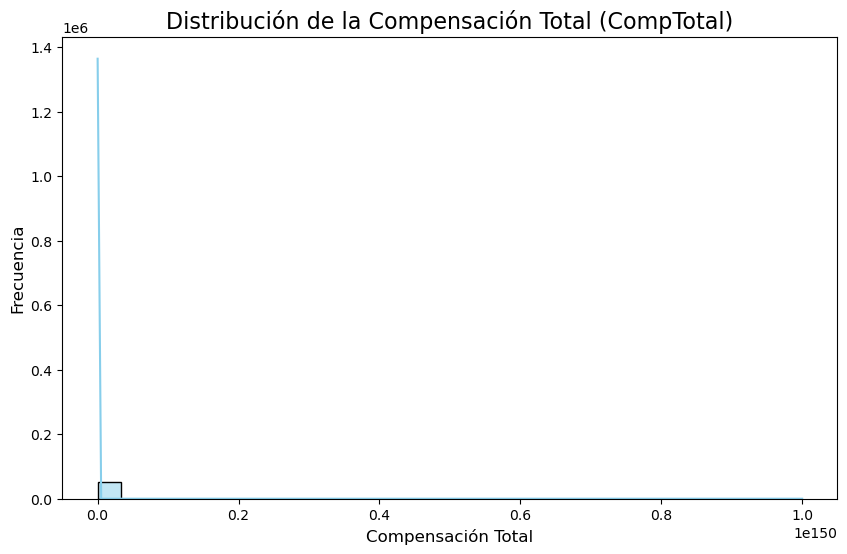

In [16]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a query to get the 'CompTotal' column from the 'main' table
QUERY = "SELECT CompTotal FROM main"
df_compensation = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Plotting the histogram of 'CompTotal' (Total Compensation)
plt.figure(figsize=(10, 6))
sns.histplot(df_compensation['CompTotal'], kde=True, bins=30, color='skyblue')

# Titles and labels
plt.title('Distribución de la Compensación Total (CompTotal)', fontsize=16)
plt.xlabel('Compensación Total', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Show the plot
plt.show()

In [17]:
### Tarea 73 - box plot of Age.

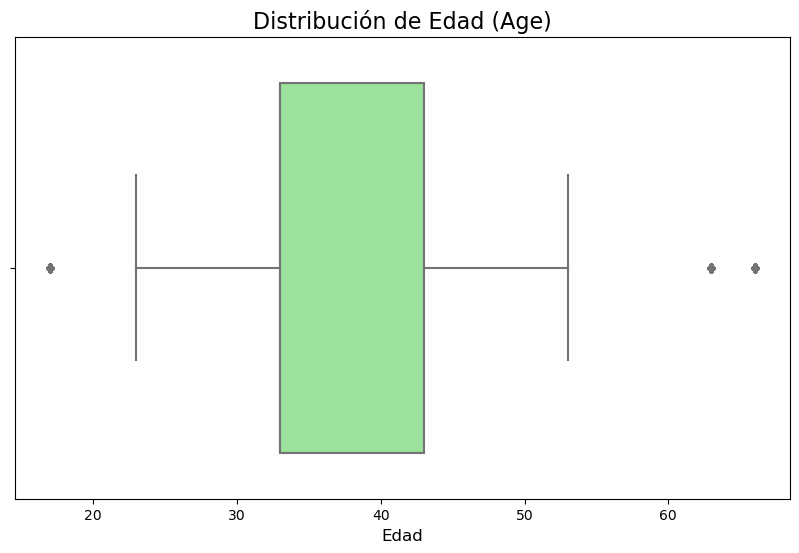

In [18]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a query to get the 'Age' column from the 'main' table
QUERY = "SELECT AgeNum FROM main"
df_age = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Plotting the box plot of 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_age['AgeNum'], color='lightgreen')

# Titles and labels
plt.title('Distribución de Edad (Age)', fontsize=16)
plt.xlabel('Edad', fontsize=12)

# Show the plot
plt.show()

In [19]:
### Tarea 74: Diagrama de dispersión de Edad y Gastos laborales.

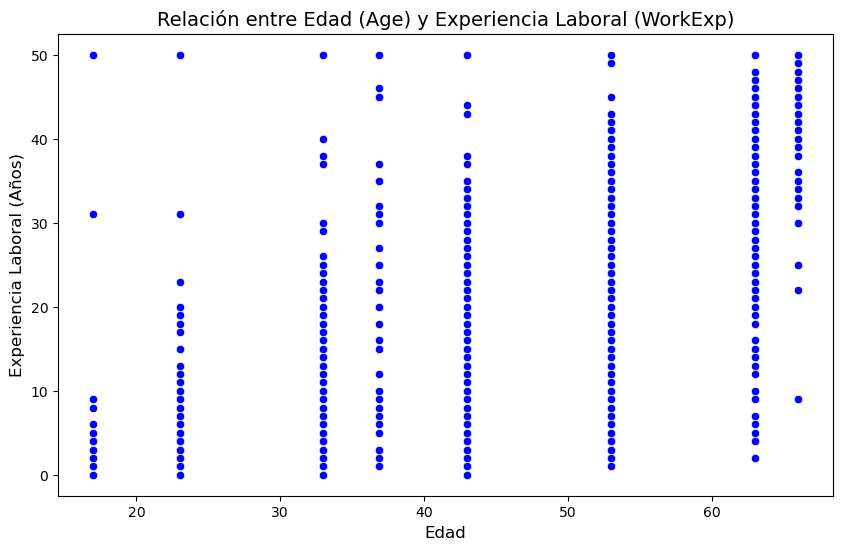

In [20]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a query to get the 'Age' and 'WorkExp' columns from the 'main' table
QUERY = "SELECT AgeNum, WorkExp FROM main"
df_relationship = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_relationship['AgeNum'], y=df_relationship['WorkExp'], color='blue')

# Titles and labels
plt.title('Relación entre Edad (Age) y Experiencia Laboral (WorkExp)', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Experiencia Laboral (Años)', fontsize=12)

# Show the plot
plt.show()

In [21]:
### Tarea 75: Diagrama de burbujas de Búsqueda temporal y Frustración utilizando la columna Edad como tamaño de burbuja.

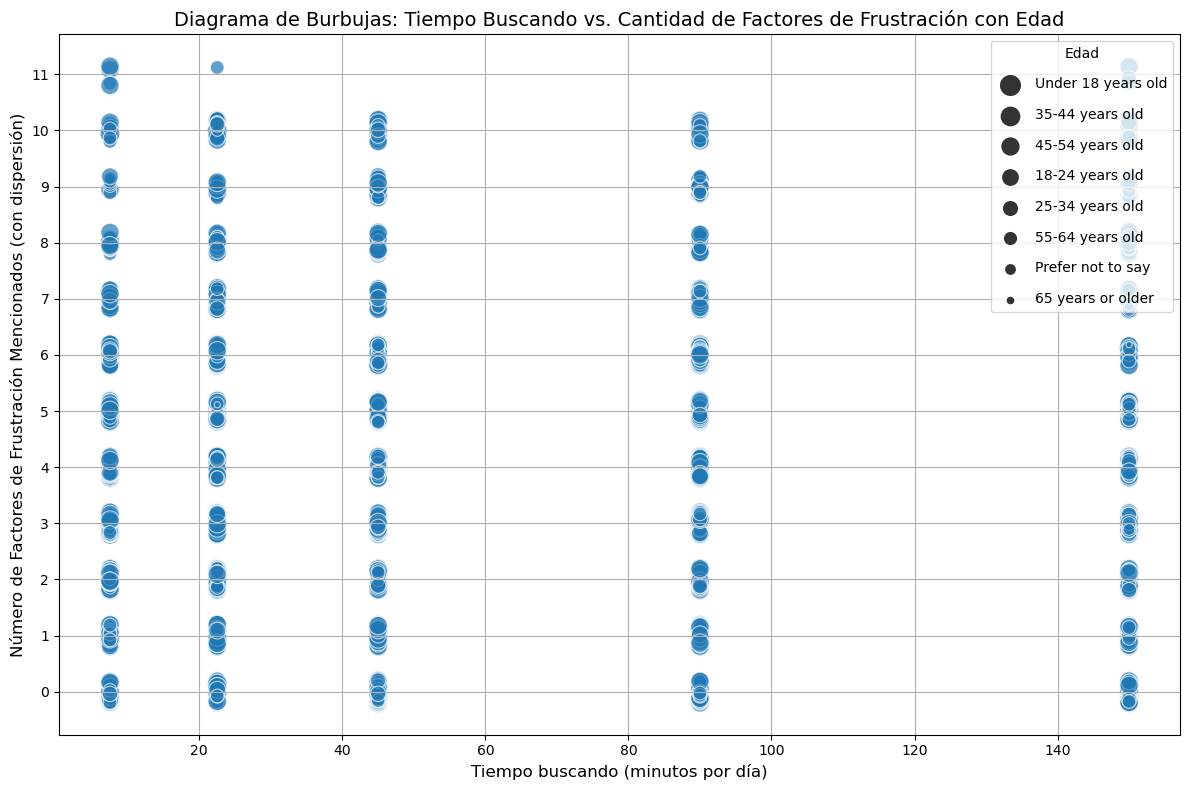

In [22]:
import random

# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL para obtener las columnas necesarias
QUERY = """
SELECT TimeSearching, Frustration, Age FROM main
"""

# Leer los datos en un DataFrame de pandas
df = pd.read_sql_query(QUERY, conn)

# Cerrar la conexión
conn.close()

# Convertir 'TimeSearching' a minutos
def convert_time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    if time_str == 'Less than 15 minutes a day':
        return 7.5
    elif time_str == '15-30 minutes a day':
        return 22.5
    elif time_str == '30-60 minutes a day':
        return 45
    elif time_str == '60-120 minutes a day':
        return 90
    elif time_str == 'Over 120 minutes a day':
        return 150
    return None

df['TimeSearching_minutes'] = df['TimeSearching'].apply(convert_time_to_minutes)
df_cleaned = df.dropna(subset=['TimeSearching_minutes', 'Frustration', 'Age'])

# Contar el número de factores de frustración
df_cleaned['Frustration_Count'] = df_cleaned['Frustration'].apply(lambda x: len(x.split(';')) if isinstance(x, str) and x != 'None of these' else 0)

# Añadir jitter al eje y (Frustration Count)
jitter = 0.2
df_cleaned['Frustration_Count_jittered'] = df_cleaned['Frustration_Count'] + [random.uniform(-jitter, jitter) for _ in range(len(df_cleaned))]

# Crear el diagrama de burbujas
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='TimeSearching_minutes', y='Frustration_Count_jittered',
                size='Age', sizes=(20, 200), alpha=0.7) # Aumenté ligeramente la transparencia

# Títulos y etiquetas
plt.title('Diagrama de Burbujas: Tiempo Buscando vs. Cantidad de Factores de Frustración con Edad', fontsize=14)
plt.xlabel('Tiempo buscando (minutos por día)', fontsize=12)
plt.ylabel('Número de Factores de Frustración Mencionados (con dispersión)', fontsize=12)
plt.legend(title='Edad', scatterpoints=1, labelspacing=1.2, fontsize=10)
plt.yticks(range(df_cleaned['Frustration_Count'].max() + 1)) # Asegurar etiquetas del eje y correctas
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
### Tarea 76: Gráfico circular de las 5 bases de datos principales (DatabaseWantToWorkWith) que los encuestados desean aprender el próximo año

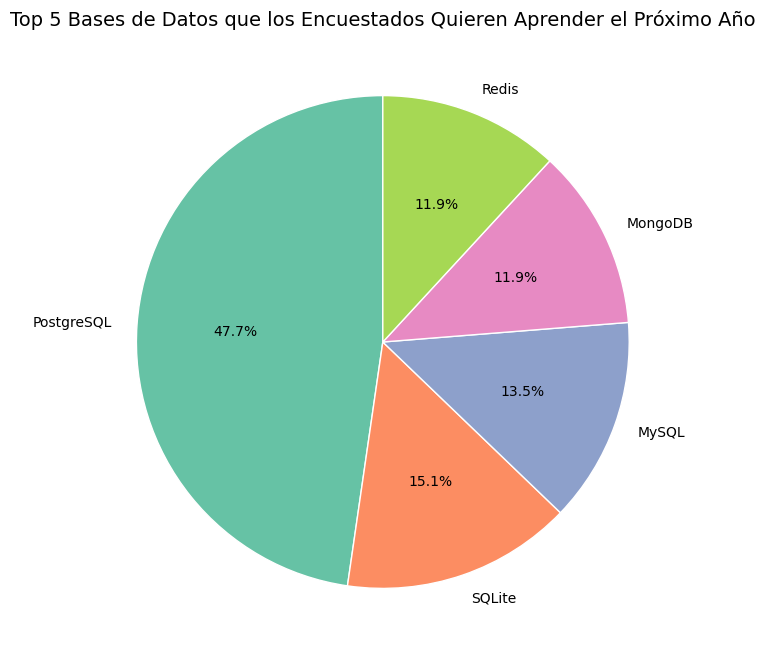

In [24]:
# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL para obtener la columna 'DatabaseWantToWorkWith'
QUERY = """
SELECT DatabaseWantToWorkWith FROM main
"""

# Leer los datos en un DataFrame de pandas
df = pd.read_sql_query(QUERY, conn)

# Cerrar la conexión
conn.close()

# Procesar los datos
databases = df['DatabaseWantToWorkWith'].dropna().str.split(';', expand=True).stack()
top_databases = databases.value_counts().head(5)

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2', n_colors=5)  # Colores más suaves y atractivos

# Crear el gráfico de pastel con líneas blancas
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=90, 
        colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Títulos y etiquetas
plt.title('Top 5 Bases de Datos que los Encuestados Quieren Aprender el Próximo Año', fontsize=14)

# Mostrar el gráfico
plt.show()

In [25]:
### Tarea 77 - Gráfico de barras apiladas con la mediana de Tiempo de búsqueda y Tiempo de respuesta para el grupo de edad de 30 a 35 años.

C:\Users\valki\AppData\Local\Temp\ipykernel_34588\1445640325.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeSearching_minutes'] = df_filtered['TimeSearching'].apply(convert_time_to_minutes)
C:\Users\valki\AppData\Local\Temp\ipykernel_34588\1445640325.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeAnswering_minutes'] = df_filtered['TimeAnswering'].apply(convert_time_to_minutes)


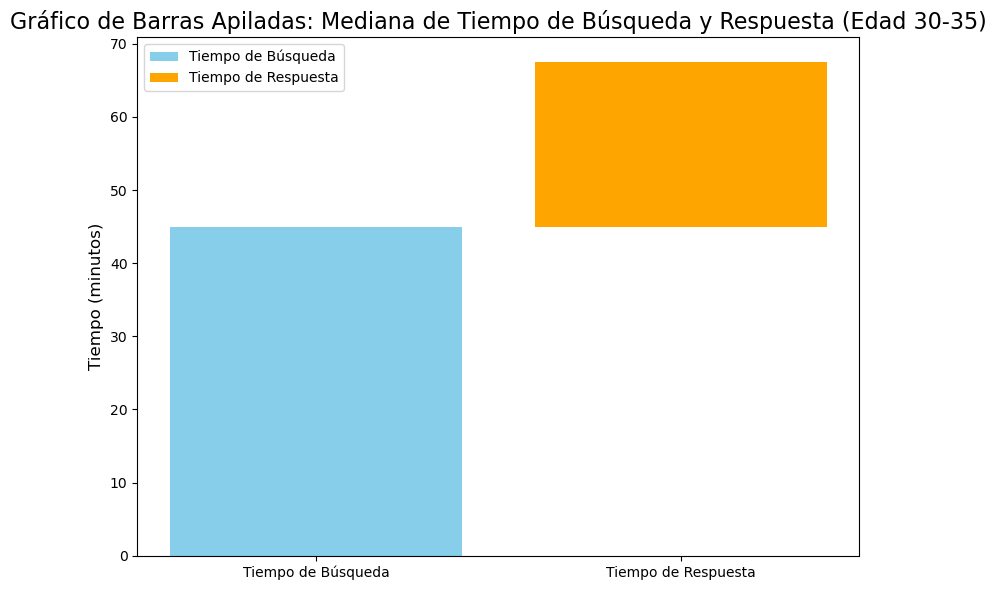

In [26]:
# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL para obtener las columnas necesarias
QUERY = """
SELECT TimeSearching, TimeAnswering, AgeNum FROM main
"""

# Leer los datos en un DataFrame de pandas
df = pd.read_sql_query(QUERY, conn)

# Cerrar la conexión
conn.close()

# Filtrar los datos para el grupo de edad de 30 a 35 años
df_filtered = df[(df['AgeNum'] >= 30) & (df['AgeNum'] <= 35)]

# Convertir las columnas TimeSearching y TimeResponding a minutos
def convert_time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    if time_str == 'Less than 15 minutes a day':
        return 7.5
    elif time_str == '15-30 minutes a day':
        return 22.5
    elif time_str == '30-60 minutes a day':
        return 45
    elif time_str == '60-120 minutes a day':
        return 90
    elif time_str == 'Over 120 minutes a day':
        return 150
    return None

df_filtered['TimeSearching_minutes'] = df_filtered['TimeSearching'].apply(convert_time_to_minutes)
df_filtered['TimeAnswering_minutes'] = df_filtered['TimeAnswering'].apply(convert_time_to_minutes)

# Eliminar filas con valores nulos
df_filtered = df_filtered.dropna(subset=['TimeSearching_minutes', 'TimeAnswering_minutes'])

# Calcular la mediana de TimeSearching y TimeResponding
mediana_times = df_filtered[['TimeSearching_minutes', 'TimeAnswering_minutes']].median()

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar('Tiempo de Búsqueda', mediana_times['TimeSearching_minutes'], color='skyblue', label='Tiempo de Búsqueda')
ax.bar('Tiempo de Respuesta', mediana_times['TimeAnswering_minutes'], color='orange', bottom=mediana_times['TimeSearching_minutes'], label='Tiempo de Respuesta')

# Títulos y etiquetas
ax.set_title('Gráfico de Barras Apiladas: Mediana de Tiempo de Búsqueda y Respuesta (Edad 30-35)', fontsize=16)
ax.set_ylabel('Tiempo (minutos)', fontsize=12)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [27]:
### Tarea 78 - Graficar la mediana de CompTotal para todas las edades de 45 a 60 años.

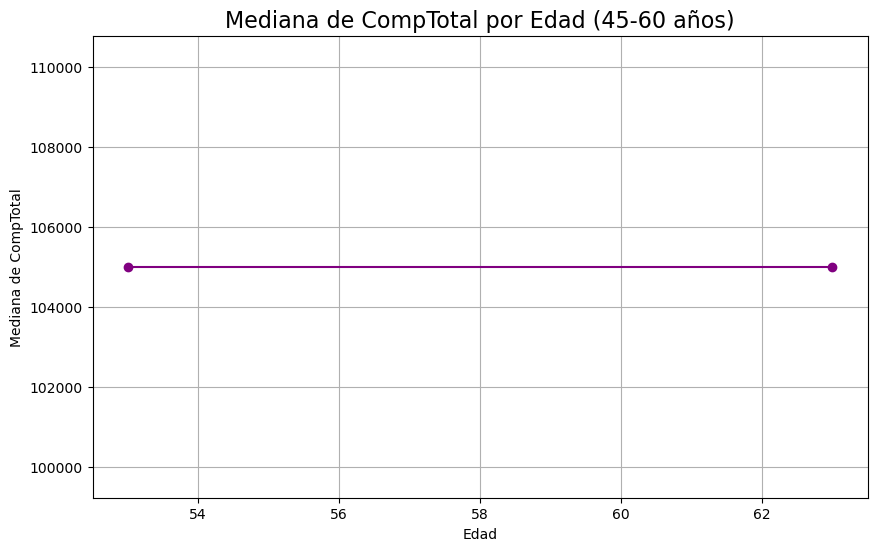

In [28]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a query to get Age and CompTotal columns for ages 45 to 60
QUERY = "SELECT AgeNum, CompTotal FROM main WHERE Age BETWEEN 45 AND 60"
df_age_group = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Calcular la mediana de CompTotal para cada edad en el rango de 45 a 60
median_comp_total = df_age_group.groupby('AgeNum')['CompTotal'].median()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
median_comp_total.plot(kind='line', marker='o', color='purple')

# Títulos y etiquetas
plt.title('Mediana de CompTotal por Edad (45-60 años)', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Mediana de CompTotal')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [29]:
### Tarea 79: Gráfico de barras horizontales usando la columna MainBranch 

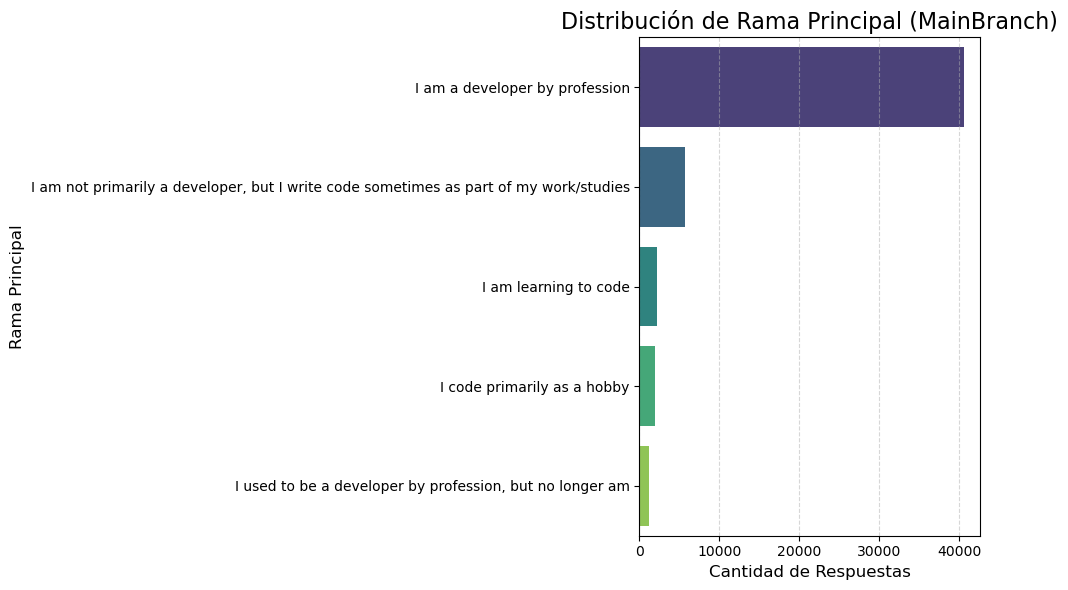

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener la columna 'MainBranch'
QUERY = "SELECT MainBranch FROM main"
df_branch = pd.read_sql_query(QUERY, conn)

# Cerrar la conexión
conn.close()

# Contar frecuencia de cada valor en MainBranch
branch_counts = df_branch['MainBranch'].value_counts()

# Configurar estilo de gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=branch_counts.values, y=branch_counts.index, palette='viridis')

# Títulos y etiquetas
plt.title('Distribución de Rama Principal (MainBranch)', fontsize=16)
plt.xlabel('Cantidad de Respuestas', fontsize=12)
plt.ylabel('Rama Principal', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [31]:
###Tarea 80 - Cerrar la conexion a la base de datos

In [32]:
# Cierre de la conexión
conn.close()


In [33]:
# -----------------------------------------------------------------------------------------------------------------------------------------------------#

In [34]:
### Labs 12 - Histogram
# Tareas 81 a 84 ya estan realizadas al inicio de este NoteBook

In [35]:
# Conectarse a la base de datos SQLite.
conn = sqlite3.connect('survey-data.sqlite')

In [36]:
### Tarea 85 - Histograma de CompTotal (Remuneración total)

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


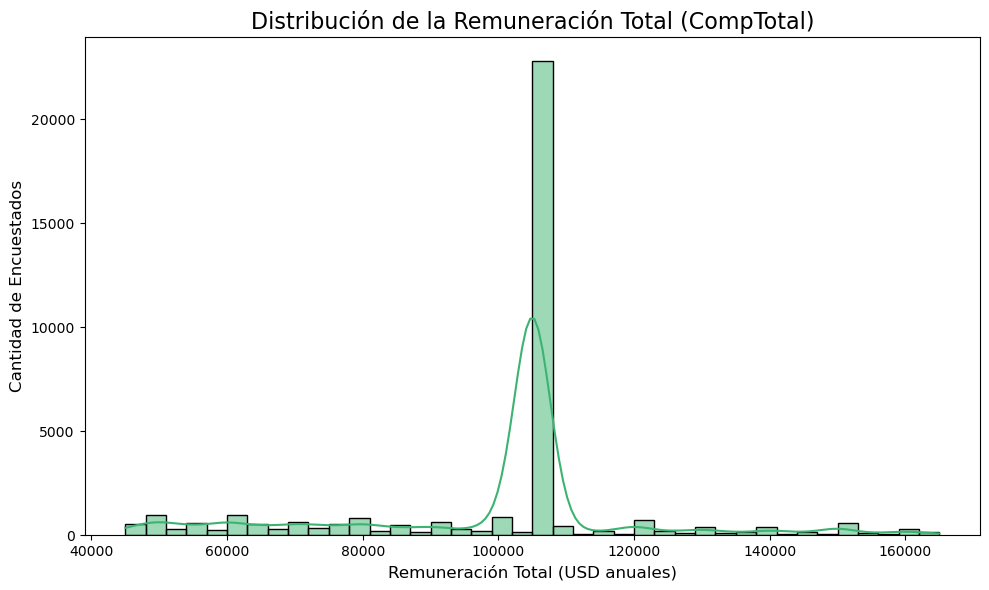

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer la columna CompTotal
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Cerrar la conexión
conn.close()

# Convertir a valores numéricos y eliminar nulos
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_clean = df.dropna(subset=['CompTotal'])

# Eliminar valores extremos (outliers) usando el rango intercuartílico (IQR)
q1 = df_clean['CompTotal'].quantile(0.25)
q3 = df_clean['CompTotal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_filtered = df_clean[(df_clean['CompTotal'] >= lower_bound) & (df_clean['CompTotal'] <= upper_bound)]

# Dibujar el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CompTotal'], bins=40, color='mediumseagreen', kde=True)

# Títulos y etiquetas
plt.title('Distribución de la Remuneración Total (CompTotal)', fontsize=16)
plt.xlabel('Remuneración Total (USD anuales)', fontsize=12)
plt.ylabel('Cantidad de Encuestados', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [38]:
### Tarea 86 - Histograma de la columna YearsCodePro y analizar la distribución de la experiencia en programación

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


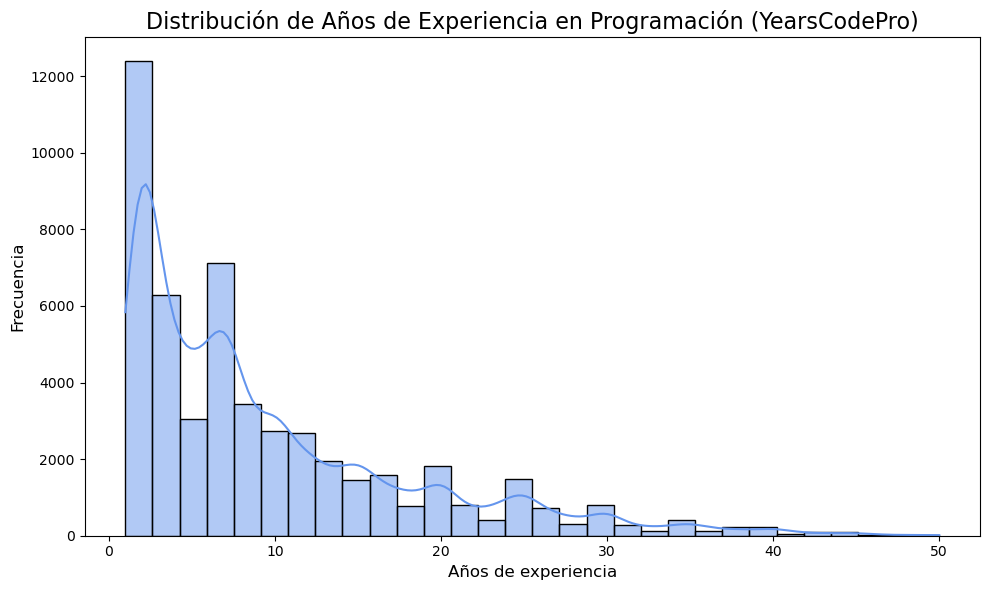

In [39]:
# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Obtener la columna YearsCodePro
query = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(query, conn)

# Cerrar la conexión
conn.close()

# Limpiar y convertir a valores numéricos
def convertir_experiencia(valor):
    if pd.isna(valor):
        return None
    if valor == "Less than 1 year":
        return 0.5
    if valor == "More than 50 years":
        return 51
    try:
        return float(valor)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convertir_experiencia)
df.dropna(subset=['YearsCodePro'], inplace=True)

# Dibujar el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsCodePro'], bins=30, color='cornflowerblue', kde=True)

# Títulos y etiquetas
plt.title('Distribución de Años de Experiencia en Programación (YearsCodePro)', fontsize=16)
plt.xlabel('Años de experiencia', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [40]:
### Tarea 87 - Comparación de histogramas de CompTotal por grupo de edad.

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


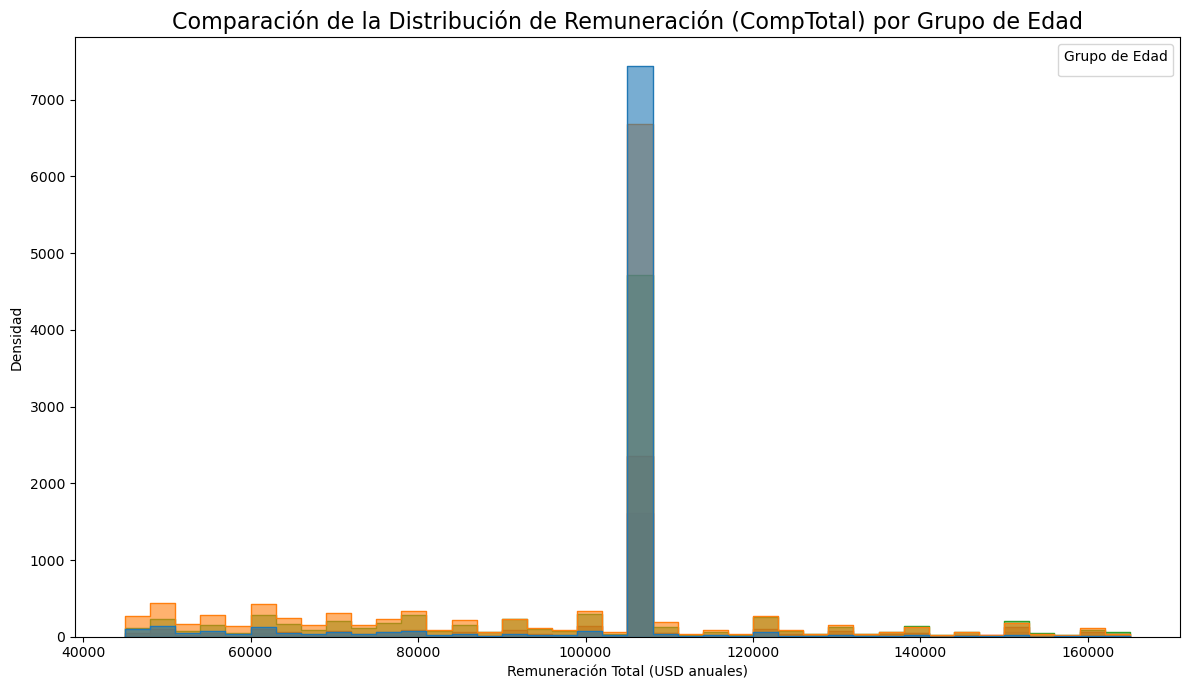

In [41]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT AgeNum, CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Conversión de datos
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['AgeNum'] = pd.to_numeric(df['AgeNum'], errors='coerce')
df.dropna(subset=['CompTotal', 'AgeNum'], inplace=True)

# Excluir los valores imputados (mediana: 64444.0)
df = df[df['CompTotal'] != 64444.0]

# Definir grupos de edad
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)

# Eliminar outliers de CompTotal usando IQR
q1 = df['CompTotal'].quantile(0.25)
q3 = df['CompTotal'].quantile(0.75)
iqr = q3 - q1
df = df[(df['CompTotal'] >= q1 - 1.5 * iqr) & (df['CompTotal'] <= q3 + 1.5 * iqr)]

# Graficar histogramas comparativos
plt.figure(figsize=(12, 7))
#sns.histplot(data=df, x='CompTotal', hue='AgeGroup', element='step', stat='density', common_norm=False, bins=40)
sns.histplot(data=df, x='CompTotal', hue='AgeGroup', element='step', stat='count',
             common_norm=False, bins=40, alpha=0.6)

plt.title('Comparación de la Distribución de Remuneración (CompTotal) por Grupo de Edad', fontsize=16)
plt.xlabel('Remuneración Total (USD anuales)')
plt.ylabel('Densidad')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()


In [42]:
### Tarea 88 - Histogramas para explorar la distribución del Tiempo de Búsqueda de los encuestados en diferentes grupos de edad

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


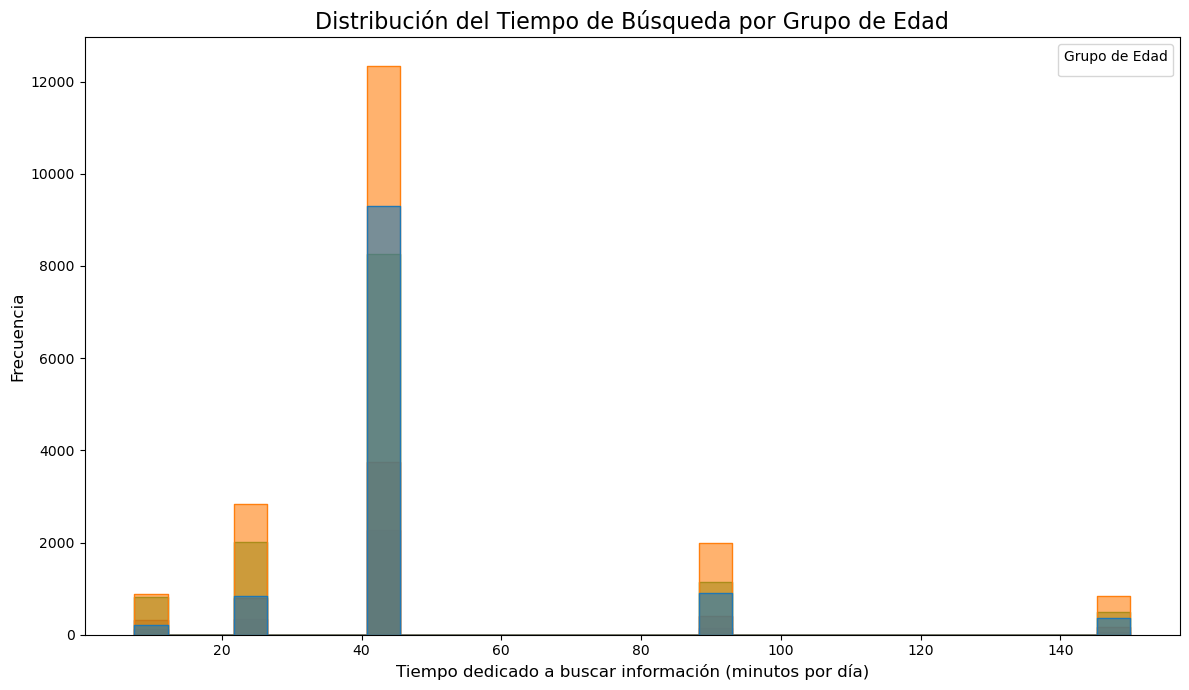

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT AgeNum, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Conversión de columnas
df['AgeNum'] = pd.to_numeric(df['AgeNum'], errors='coerce')
df['TimeSearching'] = df['TimeSearching'].astype(str)

# Convertir categorías de tiempo a minutos
def convert_time_to_minutes(value):
    if pd.isna(value):
        return None
    if 'Less than 15 minutes' in value:
        return 7.5
    elif '15-30' in value:
        return 22.5
    elif '30-60' in value:
        return 45
    elif '60-120' in value:
        return 90
    elif 'Over 120' in value:
        return 150
    return None

df['TimeSearching_Minutes'] = df['TimeSearching'].apply(convert_time_to_minutes)

# Eliminar registros faltantes
df.dropna(subset=['TimeSearching_Minutes', 'AgeNum'], inplace=True)

# Definir grupos de edad
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)

# Graficar histogramas comparativos
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='TimeSearching_Minutes', hue='AgeGroup', element='step',
             stat='count', common_norm=False, bins=30, alpha=0.6)

plt.title('Distribución del Tiempo de Búsqueda por Grupo de Edad', fontsize=16)
plt.xlabel('Tiempo dedicado a buscar información (minutos por día)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()


In [44]:
### Tarea 89 - Histograma de las Bases de Datos Más Deseadas (DatabaseWantToWorkWith)

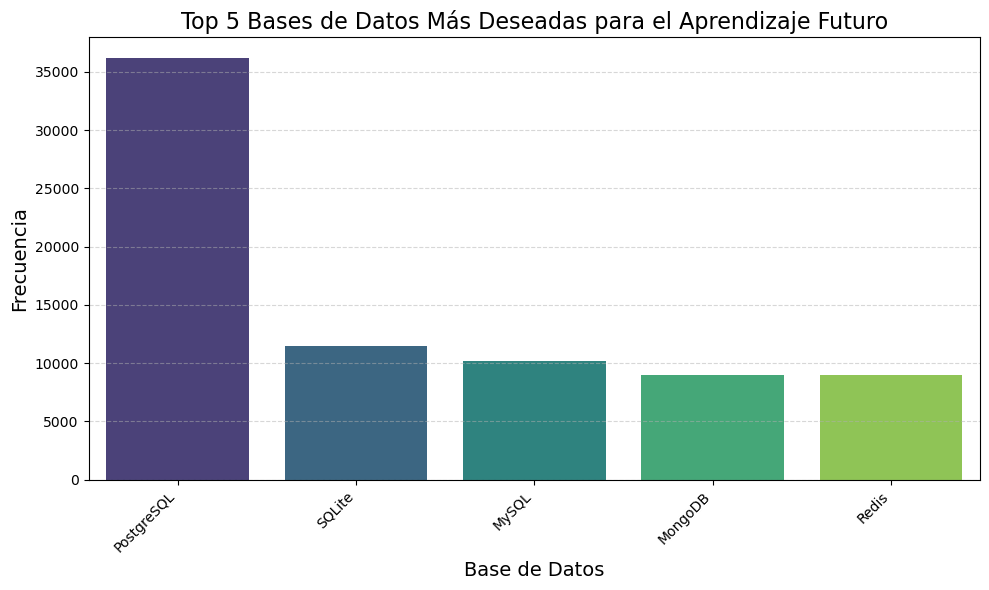

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Separar múltiples bases de datos y contar
all_dbs = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()
top_5 = all_dbs.value_counts().head(5)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette='viridis')

# Estética
plt.title('Top 5 Bases de Datos Más Deseadas para el Aprendizaje Futuro', fontsize=16)
plt.xlabel('Base de Datos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [46]:
### Tarea 90 - Histograma para explorar la distribución de las modalidades de trabajo preferidas (teletrabajo)

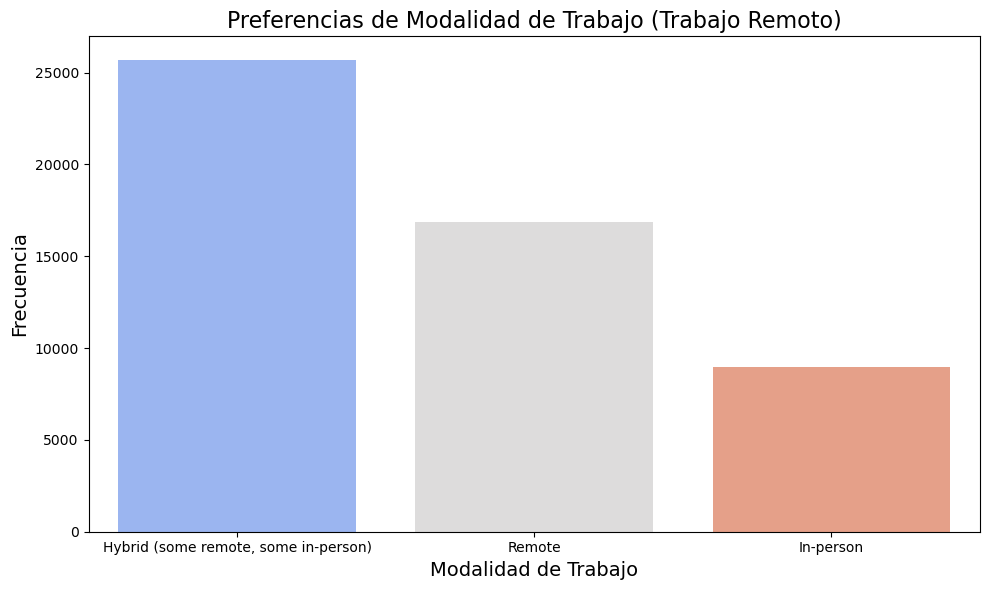

In [47]:
# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consultar la columna 'RemoteWork' para obtener las preferencias sobre trabajo remoto
QUERY = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df_remote_work = pd.read_sql_query(QUERY, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Contar la frecuencia de las preferencias de trabajo remoto
remote_work_counts = df_remote_work['RemoteWork'].value_counts()

# Graficar un histograma de las preferencias de trabajo remoto
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette='coolwarm')

# Títulos y etiquetas
plt.title('Preferencias de Modalidad de Trabajo (Trabajo Remoto)', fontsize=16)
plt.xlabel('Modalidad de Trabajo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [48]:
### Tarea 91 - Histograma de la Mediana de CompTotal para las Edades de 45 a 60

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


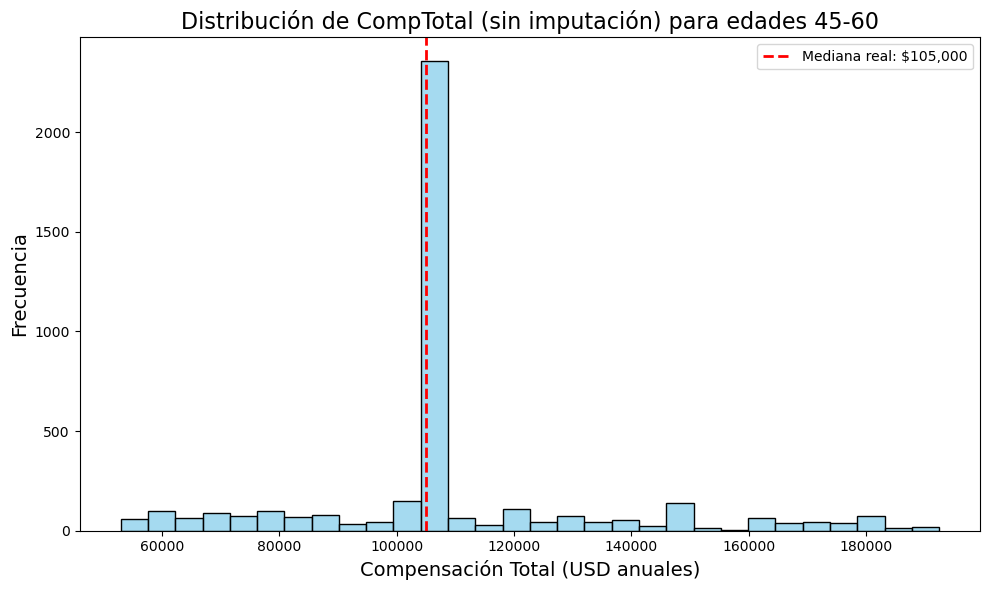

In [49]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener datos de 'Age' y 'CompTotal'
query = "SELECT AgeNum, CompTotal FROM main WHERE AgeNum IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Conversión de datos
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['AgeNum'] = pd.to_numeric(df['AgeNum'], errors='coerce')
df.dropna(subset=['CompTotal', 'AgeNum'], inplace=True)

# Filtrar el DataFrame para el grupo de edad entre 45 y 60
df_filtered = df[
    (df['AgeNum'] >= 45) & 
    (df['AgeNum'] <= 60) & 
    (df['CompTotal'] != 64444.0)  # Excluir valores imputados
]

# Limpiar los outliers usando el IQR (rango intercuartil)
Q1 = df_filtered['CompTotal'].quantile(0.25)
Q3 = df_filtered['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df_filtered[(df_filtered['CompTotal'] >= Q1 - 1.5 * IQR) & (df_filtered['CompTotal'] <= Q3 + 1.5 * IQR)]

# Graficar el histograma de 'CompTotal' para este grupo de edad
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CompTotal'], kde=False, bins=30, color='skyblue')

# Línea de mediana real (sin imputados)
median_real = df_filtered['CompTotal'].median()
plt.axvline(median_real, color='red', linestyle='--', linewidth=2, label=f'Mediana real: ${median_real:,.0f}')

# Títulos y etiquetas
plt.title('Distribución de CompTotal (sin imputación) para edades 45-60', fontsize=16)
plt.xlabel('Compensación Total (USD anuales)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
### Tarea 92 - Histograma de satisfacción laboral (JobSat) de YearsCodePro

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


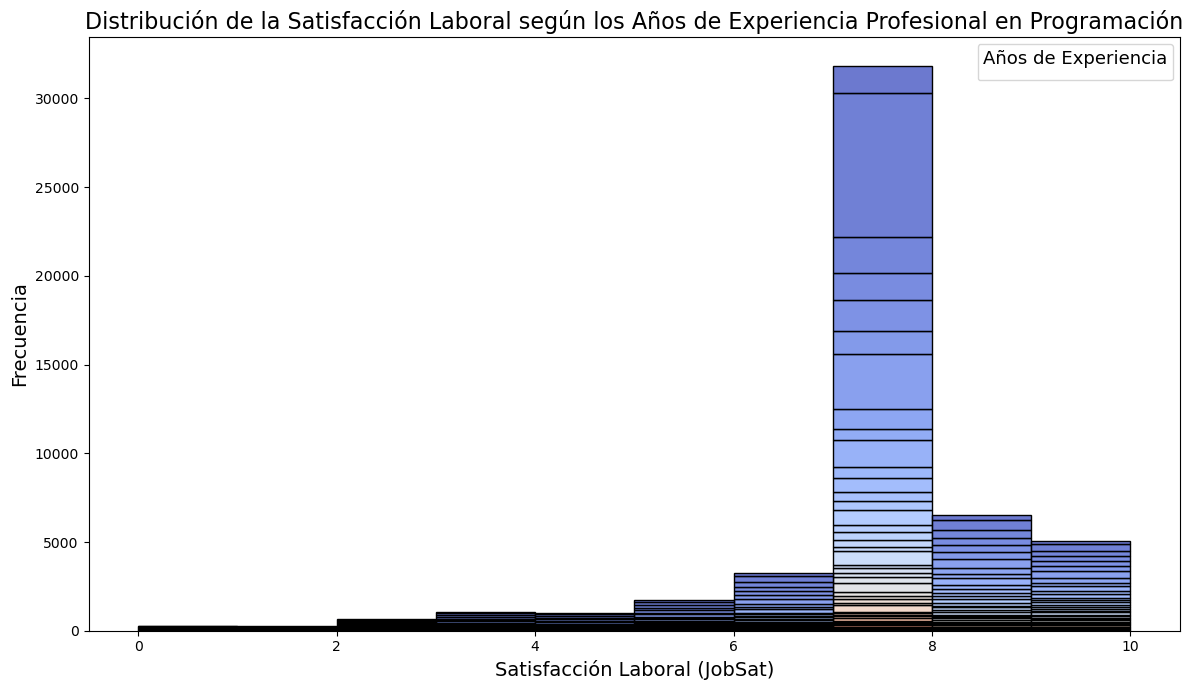

In [51]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener 'JobSat' y 'YearsCodePro'
query = "SELECT JobSat, YearsCodePro FROM main WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Conversión de datos
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Eliminar filas con valores nulos en 'JobSat' y 'YearsCodePro'
df.dropna(subset=['JobSat', 'YearsCodePro'], inplace=True)

# Graficar el histograma de satisfacción laboral por años de experiencia
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='JobSat', hue='YearsCodePro', multiple='stack', kde=False, bins=10, palette='coolwarm')

# Títulos y etiquetas
plt.title('Distribución de la Satisfacción Laboral según los Años de Experiencia Profesional en Programación', fontsize=16)
plt.xlabel('Satisfacción Laboral (JobSat)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(title='Años de Experiencia', title_fontsize='13', loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [52]:
# Cerrar la conexión
conn.close()

In [53]:
# -----------------------------------------------------------------------------------------------------------------------------------------------------#

In [54]:
### Labs 13 - Box Plot
# Tareas 93 a 97 ya estan realizadas al inicio de este NoteBook

In [55]:
### Tarea 98 - Box Plot de CompTotal

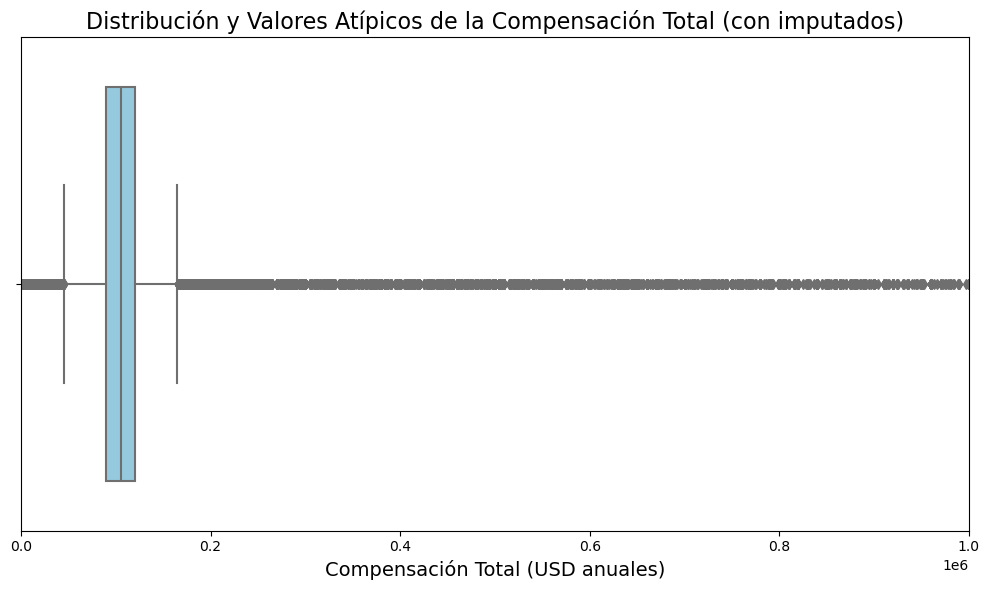

In [56]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener 'CompTotal' (compensación total)
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Conversión de datos
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Eliminar filas con valores nulos en 'CompTotal'
df.dropna(subset=['CompTotal'], inplace=True)

# Excluir los valores imputados (suponiendo que los imputados son iguales a la mediana)
#median_value = df['CompTotal'].median()
#df_real = df[df['CompTotal'] != median_value]

# Crear el diagrama de caja con eje x acotado
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompTotal'], color='skyblue')
plt.xlim(0, 1000000)  # Acotar el eje x a 1 millón USD (ajusta según consideres)

# Títulos y etiquetas
plt.title('Distribución y Valores Atípicos de la Compensación Total (con imputados)', fontsize=16)
plt.xlabel('Compensación Total (USD anuales)', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

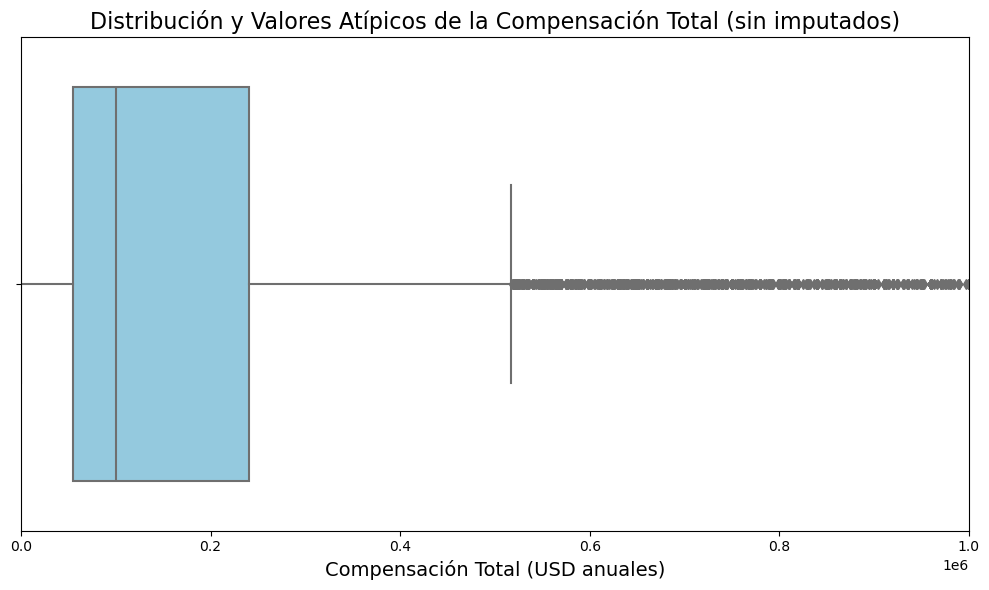

In [57]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener 'CompTotal' (compensación total)
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Conversión de datos
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Eliminar filas con valores nulos en 'CompTotal'
df.dropna(subset=['CompTotal'], inplace=True)

#Excluir los valores imputados (suponiendo que los imputados son iguales a la mediana)
median_value = df['CompTotal'].median()
df_real = df[df['CompTotal'] != median_value]

# Crear el diagrama de caja con eje x acotado
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_real['CompTotal'], color='skyblue')
plt.xlim(0, 1000000)  # Acotar el eje x a 1 millón USD (ajusta según consideres)

# Títulos y etiquetas
plt.title('Distribución y Valores Atípicos de la Compensación Total (sin imputados)', fontsize=16)
plt.xlabel('Compensación Total (USD anuales)', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [58]:
### Tarea 99 - Box Plot de Age

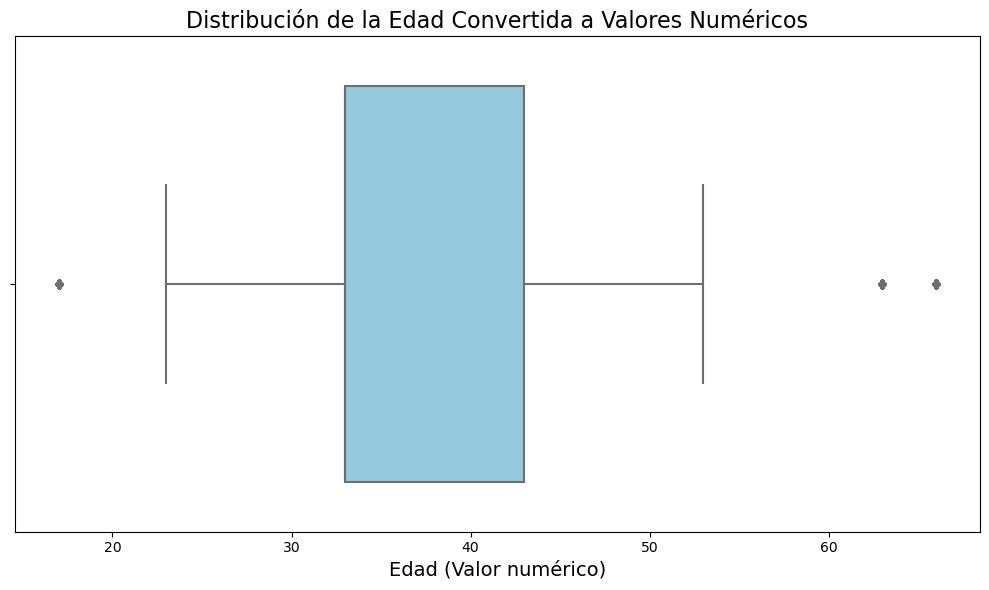

In [59]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener los datos de la columna 'AgeNum'
query = "SELECT AgeNum FROM main WHERE AgeNum IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Visualizar el diagrama de caja (boxplot) de 'AgeNum'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeNum'], color='skyblue')

# Títulos y etiquetas
plt.title('Distribución de la Edad Convertida a Valores Numéricos', fontsize=16)
plt.xlabel('Edad (Valor numérico)', fontsize=14)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [60]:
### Tarea 100 - Box Plot de CompTotal agrupado por Edad

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


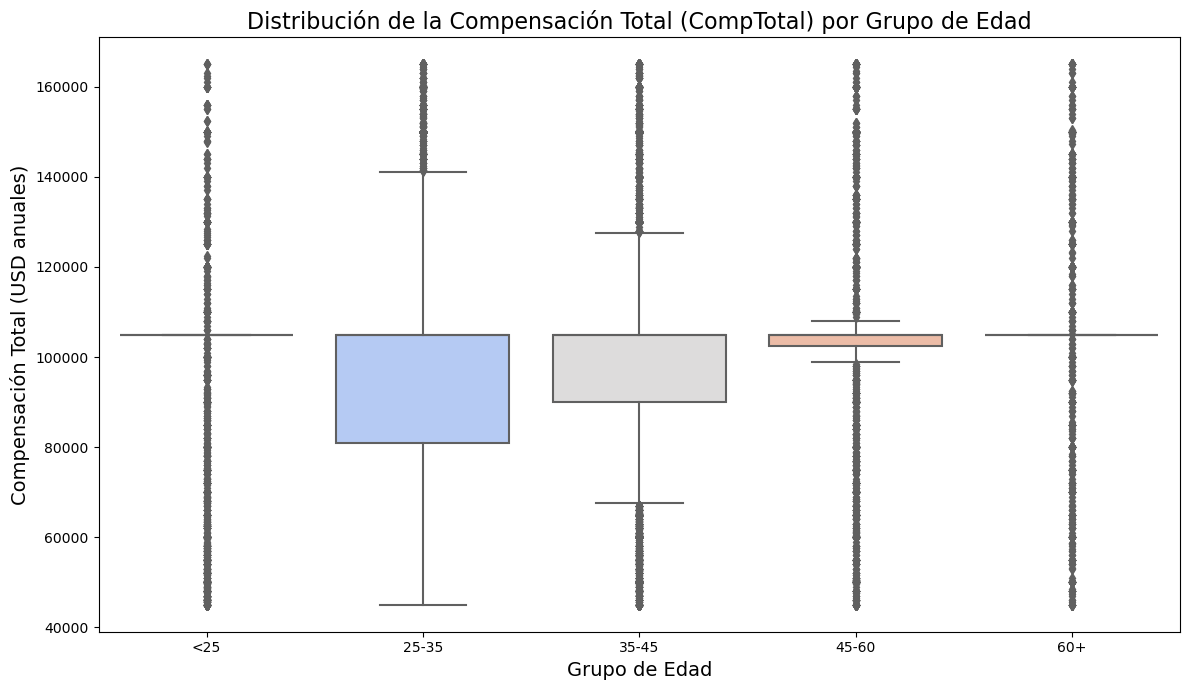

In [61]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener datos de 'AgeNum' y 'CompTotal'
query = "SELECT AgeNum, CompTotal FROM main WHERE AgeNum IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Definir grupos de edad
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)

# Eliminar outliers de CompTotal usando IQR (opcional, si se desea limpiar los datos)
q1 = df['CompTotal'].quantile(0.25)
q3 = df['CompTotal'].quantile(0.75)
iqr = q3 - q1
df_clean = df[(df['CompTotal'] >= q1 - 1.5 * iqr) & (df['CompTotal'] <= q3 + 1.5 * iqr)]

# Graficar el diagrama de caja de 'CompTotal' agrupado por 'AgeGroup'
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_clean, x='AgeGroup', y='CompTotal', palette='coolwarm')

# Títulos y etiquetas
plt.title('Distribución de la Compensación Total (CompTotal) por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Compensación Total (USD anuales)', fontsize=14)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [62]:
### Tarea 101 - Diagrama de caja de CompTotal agrupado por satisfacción laboral (JobSatPoints_6)

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


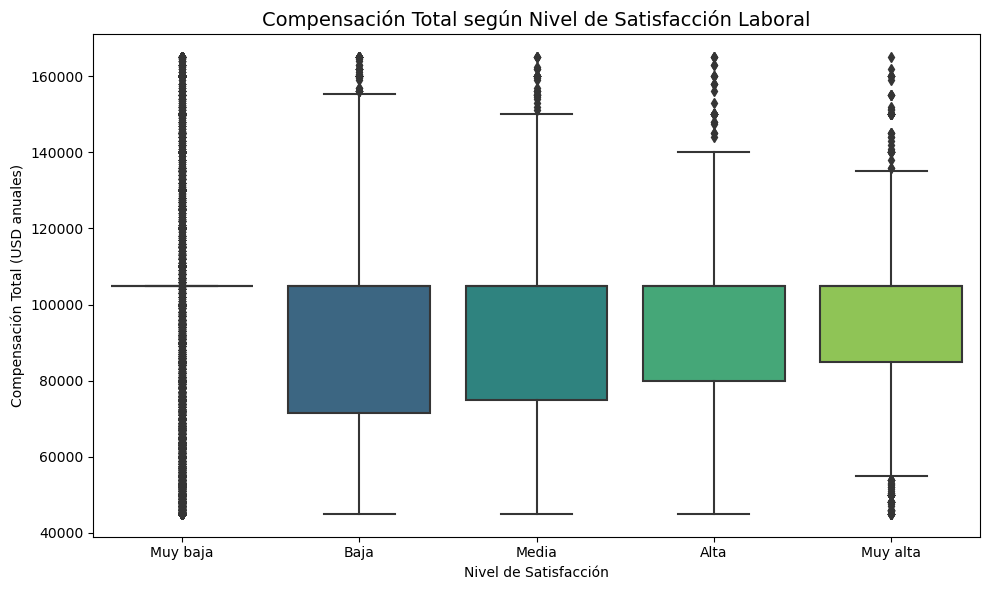

In [63]:

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT CompTotal, JobSatPoints_6 FROM main WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Conversión de columnas
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Eliminar valores faltantes después de conversión
df.dropna(subset=['CompTotal', 'JobSatPoints_6'], inplace=True)

# Filtrar valores extremos de CompTotal usando IQR
q1 = df['CompTotal'].quantile(0.25)
q3 = df['CompTotal'].quantile(0.75)
iqr = q3 - q1
df = df[(df['CompTotal'] >= q1 - 1.5 * iqr) & (df['CompTotal'] <= q3 + 1.5 * iqr)]

# Agrupar JobSatPoints_6 en rangos
df['JobSatGroup'] = pd.cut(
    df['JobSatPoints_6'],
    bins=[-1, 20, 40, 60, 80, 100],
    labels=['Muy baja', 'Baja', 'Media', 'Alta', 'Muy alta']
)

# Gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatGroup', y='CompTotal', palette='viridis')
plt.title('Compensación Total según Nivel de Satisfacción Laboral', fontsize=14)
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Compensación Total (USD anuales)')
plt.tight_layout()
plt.show()


In [64]:
### Tarea 102 - Box Plot por Tipo de Desarrollador

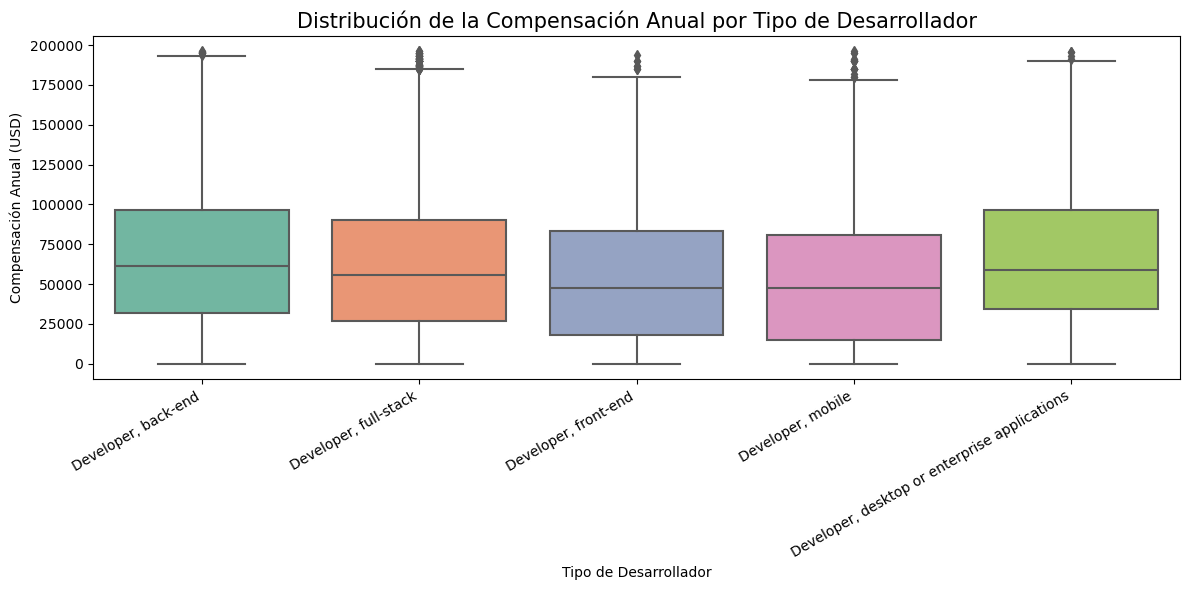

In [70]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener los datos relevantes
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convertir compensación a numérico
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Excluir valores imputados con la mediana (64,444.0)
df = df[df['ConvertedCompYearly'] != 64444.0]

# Separar múltiples tipos de desarrollador en filas individuales
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# Contar los 5 tipos de desarrolladores más frecuentes
top_devtypes = df['DevType'].value_counts().head(5).index.tolist()

# Filtrar solo esos tipos
df_top = df[df['DevType'].isin(top_devtypes)]

# Eliminar valores extremos con IQR
q1 = df_top['ConvertedCompYearly'].quantile(0.25)
q3 = df_top['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
df_top = df_top[(df_top['ConvertedCompYearly'] >= q1 - 1.5 * iqr) & (df_top['ConvertedCompYearly'] <= q3 + 1.5 * iqr)]

# Crear gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top, palette='Set2')
plt.title('Distribución de la Compensación Anual por Tipo de Desarrollador', fontsize=15)
plt.xlabel('Tipo de Desarrollador')
plt.ylabel('Compensación Anual (USD)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [71]:
### Tarea 103 - Diagrama de caja de CompTotal para los 5 principales países:

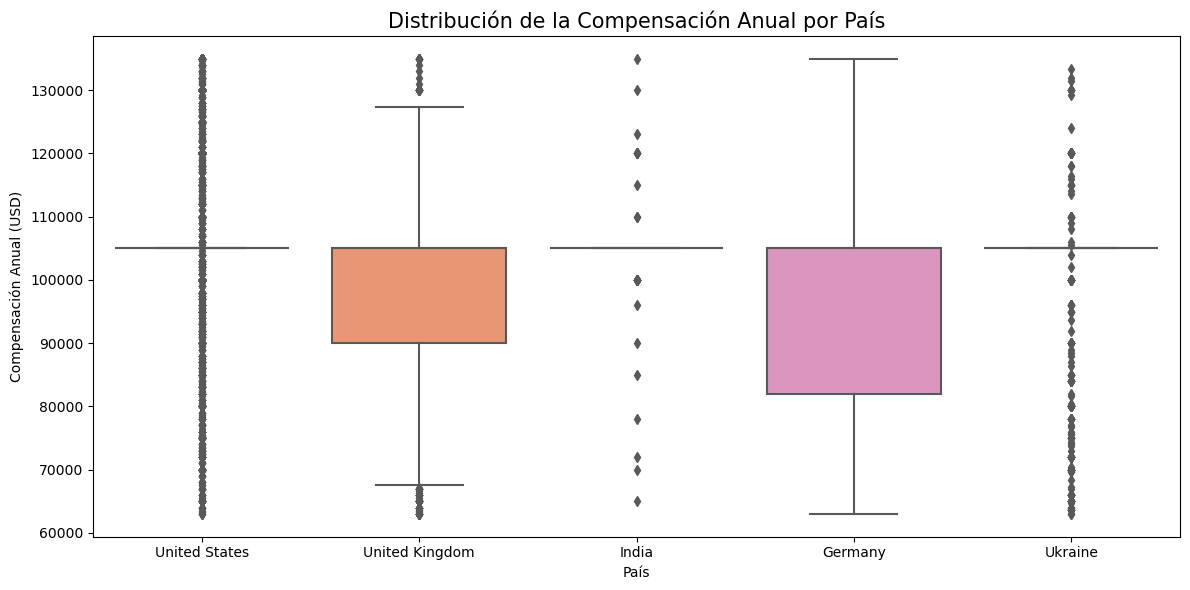

In [76]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta para obtener los datos relevantes
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convertir compensación a numérico
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Excluir valores imputados con la mediana (si aplicable)
df = df[df['CompTotal'] != 64444.0]  # Asumiendo que la mediana imputada fue 64,444

# Contar los 5 países con más encuestados
top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filtrar solo los países más frecuentes
df_top_countries = df[df['Country'].isin(top_countries)]

# Eliminar valores atípicos con IQR
q1 = df_top_countries['CompTotal'].quantile(0.25)
q3 = df_top_countries['CompTotal'].quantile(0.75)
iqr = q3 - q1
df_top_countries = df_top_countries[(df_top_countries['CompTotal'] >= q1 - 1.5 * iqr) & (df_top_countries['CompTotal'] <= q3 + 1.5 * iqr)]

# Crear gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top_countries, palette='Set2')
plt.title('Distribución de la Compensación Anual por País', fontsize=15)
plt.xlabel('País')
plt.ylabel('Compensación Anual (USD)')
plt.tight_layout()
plt.show()

In [77]:
### Tarea 104 - Box Plot de CompTotal según los tipos de empleo:

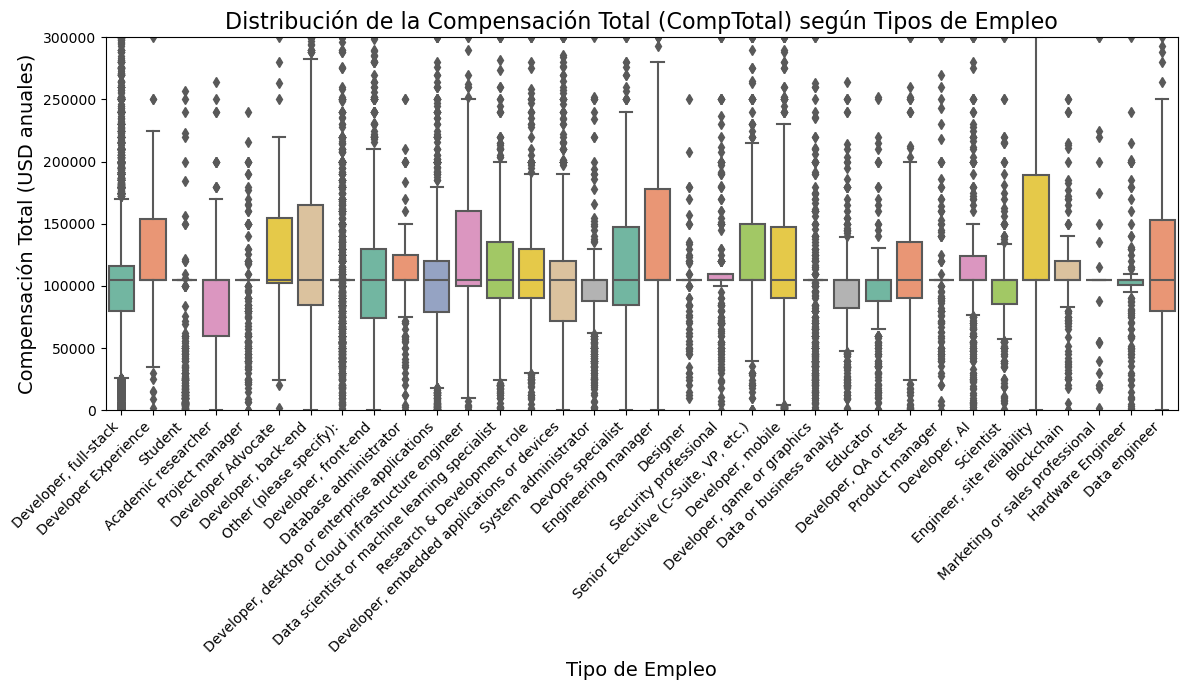

In [82]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT DevType, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Conversión de datos
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['DevType'] = df['DevType'].astype(str)  # Asegurarnos de que DevType sea una cadena

# Eliminar valores imputados de CompTotal (que fueron imputados con la mediana)
#df = df[df['CompTotal'] != 64444.0]  # Excluir la mediana imputada (64,444.0)

# Eliminar registros con valores nulos
df.dropna(subset=['CompTotal', 'DevType'], inplace=True)

# Graficar el diagrama de caja de CompTotal por tipo de empleo
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='DevType', y='CompTotal', palette='Set2')
# Acotar el eje Y
plt.ylim(0, 300000)  # Establece el límite superior del eje Y (ajusta según consideres)

# Títulos y etiquetas
plt.title('Distribución de la Compensación Total (CompTotal) según Tipos de Empleo', fontsize=16)
plt.xlabel('Tipo de Empleo', fontsize=14)
plt.ylabel('Compensación Total (USD anuales)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X para mayor claridad

# Ajustar el gráfico
plt.tight_layout()
plt.show()


In [83]:
### Tarea 105 - Box Plot de YearsCodePro según satisfacción laboral (JobSatPoints_6)

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


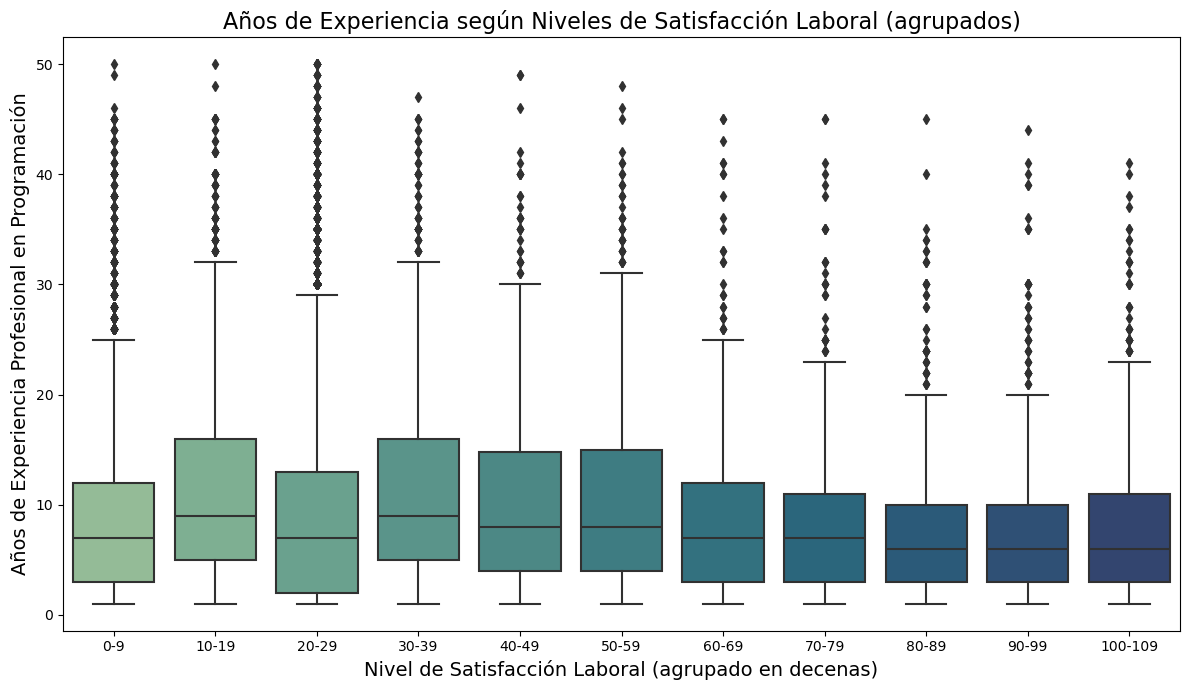

In [88]:
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Convertir YearsCodePro
def convertir_experiencia(x):
    if pd.isnull(x):
        return None
    if isinstance(x, str):
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convertir_experiencia)

# Convertir JobSatPoints_6 a numérico
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Eliminar valores nulos
df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'], inplace=True)

# Crear categorías por rangos de 10
bins = list(range(0, 111, 10))  # 0, 10, 20, ..., 100
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['JobSatGroup'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=False)

# Crear el gráfico
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='JobSatGroup', y='YearsCodePro', palette='crest')

# Ajustes estéticos
plt.title('Años de Experiencia según Niveles de Satisfacción Laboral (agrupados)', fontsize=16)
plt.xlabel('Nivel de Satisfacción Laboral (agrupado en decenas)', fontsize=14)
plt.ylabel('Años de Experiencia Profesional en Programación', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [89]:
conn.close()